In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
dfins = pd.read_csv(r"C:\Users\Saniya Mirza\Downloads\archive (5)\insurance.csv")

In [4]:
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
dfins.shape

(1338, 7)

### Checking for NaN

In [6]:
dfins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Error Detection

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

<Axes: >

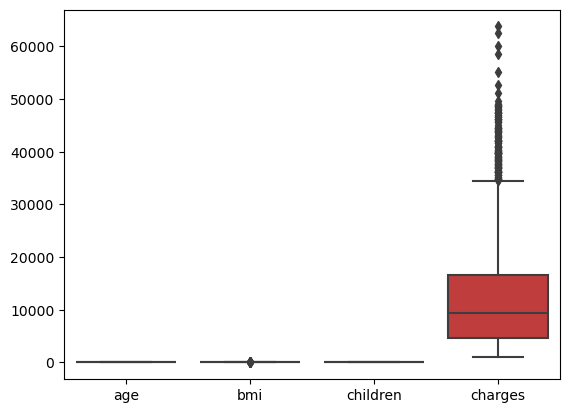

In [9]:
sns.boxplot(dfins)

<Axes: >

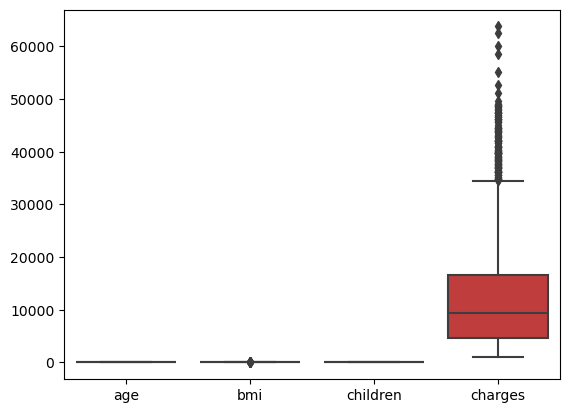

In [10]:
sns.boxplot(dfins)

In [11]:
dfins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
dfins.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
dfins["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [14]:
dfins["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [15]:
dfins["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [16]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [18]:
pip install scikit-learn

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
ohe = OneHotEncoder(drop="first")

In [21]:
ohe

OneHotEncoder(drop='first')

In [22]:
ohe.fit(dfins[["sex","smoker","region"]])

OneHotEncoder(drop='first')

In [23]:
ohe.transform(dfins[["sex","smoker","region"]])

<1338x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1964 stored elements in Compressed Sparse Row format>

In [24]:
ary1 = ohe.transform(dfins[["sex","smoker","region"]]).toarray()

In [25]:
ary1

array([[0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.]])

In [26]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [27]:
ary1.shape

(1338, 5)

In [28]:
pd.DataFrame(ary1)

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,0.0,1.0


In [29]:
dfend = pd.DataFrame(ary1 , dtype = "int" , columns = ["Male","Yes",'northwest', 'southeast', 'southwest'])

In [30]:
dfend

,Male,Yes,northwest,southeast,southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [31]:
dfins = pd.concat([dfins,dfend],axis = 1)

In [32]:
dfins

,age,sex,bmi,children,smoker,region,charges,Male,Yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,1


In [33]:
dfins.drop(["sex","smoker","region"],axis = 1,inplace = True)

In [34]:
dfins

,age,bmi,children,charges,Male,Yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


### Data Separation

In [35]:
dfins.head

<bound method NDFrame.head of       age     bmi  children      charges  Male  Yes  northwest  southeast  \
0      19  27.900         0  16884.92400     0    1          0          0   
1      18  33.770         1   1725.55230     1    0          0          1   
2      28  33.000         3   4449.46200     1    0          0          1   
3      33  22.705         0  21984.47061     1    0          1          0   
4      32  28.880         0   3866.85520     1    0          1          0   
...   ...     ...       ...          ...   ...  ...        ...        ...   
1333   50  30.970         3  10600.54830     1    0          1          0   
1334   18  31.920         0   2205.98080     0    0          0          0   
1335   18  36.850         0   1629.83350     0    0          0          1   
1336   21  25.800         0   2007.94500     0    0          0          0   
1337   61  29.070         0  29141.36030     0    1          1          0   

      southwest  
0             1  
1        

In [36]:
dfins.drop("charges",axis=1)

,age,bmi,children,Male,Yes,northwest,southeast,southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [37]:
dfins

,age,bmi,children,charges,Male,Yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [38]:
x = dfins.drop("charges",axis=1)

In [39]:
x

,age,bmi,children,Male,Yes,northwest,southeast,southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [40]:
y = dfins["charges"]

In [41]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Spliting


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [44]:
x.shape


(1338, 8)

In [45]:
y.shape

(1338,)

### Create regression model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lreg = LinearRegression()

In [48]:
lreg

LinearRegression()

In [49]:
lreg.fit(x_train,y_train)

LinearRegression()

In [50]:
lreg.score(x_test,y_test)

0.7835929767120724